## Prediction Movie Boxoffice Earnings

# Problem: 
You have historical data about moive relese, including cast, genre and budget. How would you predict a moive box office performance?

## 1. Define the Problem: 
This is classfication and regression model.

In [18]:
#step-1: import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#step-2: Load data
df = pd.read_csv('bollywood_box_clean.csv')

#step-3: Basic exploration
print(df.columns)
print(df.head())
print(df.info())

#step-4: Check if 'movie_total' exists
if 'movie_total' not in df.columns:
    raise ValueError('NO movie_total column found. Please check column names')

#step-5: Categorize the verdict based on 'movie_total'
def categorize_verdict(revenue):
    if revenue >= 100:
        return 'Blockbuster'
    elif revenue >= 50:
        return 'Hit'
    elif revenue >= 20:
        return 'Average'
    else:
        return 'Flop'

df['Verdict'] = df['movie_total'].apply(categorize_verdict)

#step-6: Drop missing values
df.dropna(inplace=True)

#step-7: Encode categorical columns
# Choose only a few relevant features based on correct column names
features = ['movie_genre', 'movie_director', 'actors']  # Use correct column names
df = df[features + ['Verdict']]  # Subset with target

label_encoders = {}
for col in features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#step-8: Split the data
X = df[features]
y = df['Verdict']  # Use the correct target column (Verdict)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#step-9: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#step-10: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

#step-11: Evaluate the model
y_pred = model.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))


Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre', 'movie_director',
       'release_date', 'release_day', 'release_month', 'release_year',
       'runtime', 'producer', 'banner', 'actors', 'movie_details'],
      dtype='object')
                           movie_name  movie_opening  movie_weekend  \
0                      Angrezi Medium           4.03           9.03   
1                            Baaghi 3          17.50          53.83   
2                             Thappad           3.07          14.66   
3         Shubh Mangal Zyada Saavdhan           9.55          32.66   
4  Bhoot: Part One - The Haunted Ship           5.10          16.36   

   movie_firstweek  movie_total  movie_total_worldwide      movie_genre  \
0             9.36         9.36                  13.50    Drama, Comedy   
1            90.67        93.37                 137.00           Action   
2            22.79        30.61  

Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre', 'movie_director',
       'release_date', 'release_day', 'release_month', 'release_year',
       'runtime', 'producer', 'banner', 'actors', 'movie_details'],
      dtype='object')
                           movie_name  movie_opening  movie_weekend  \
0                      Angrezi Medium           4.03           9.03   
1                            Baaghi 3          17.50          53.83   
2                             Thappad           3.07          14.66   
3         Shubh Mangal Zyada Saavdhan           9.55          32.66   
4  Bhoot: Part One - The Haunted Ship           5.10          16.36   

   movie_firstweek  movie_total  movie_total_worldwide      movie_genre  \
0             9.36         9.36                  13.50    Drama, Comedy   
1            90.67        93.37                 137.00           Action   
2            22.79        30.61  

In [22]:
#Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
#Step 2: Load and Explore the Data
df = pd.read_csv('bollywood_box_clean.csv')
print(df.columns)
print(df.head())
print(df.info())
#Step 3: Feature Engineering and Target Creation
# Use revenue column to create a classification target
def categorize_verdict(revenue):
    if revenue >= 100:
        return 'Blockbuster'
    elif revenue >= 50:
        return 'Hit'
    elif revenue >= 20:
        return 'Average'
    else:
        return 'Flop'

df['Verdict'] = df['movie_total'].apply(categorize_verdict)
#Step 4: Select Features & Handle Missing Data
# Select relevant features (you can add more if needed)
features = ['movie_genre', 'movie_director', 'actors', 'runtime', 'release_year']
df = df[features + ['Verdict']]
df.dropna(inplace=True)
#Step 5: Encode Categorical Variables
label_encoders = {}
for col in ['movie_genre', 'movie_director', 'actors']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
#Step 6: Train-Test Split and Scaling
X = df[features]
y = df['Verdict']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 7: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']  # Automatically handles class imbalance
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

#Step 8: Evaluate the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Step 9: Cross-Validation for General Performance
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre', 'movie_director',
       'release_date', 'release_day', 'release_month', 'release_year',
       'runtime', 'producer', 'banner', 'actors', 'movie_details'],
      dtype='object')
                           movie_name  movie_opening  movie_weekend  \
0                      Angrezi Medium           4.03           9.03   
1                            Baaghi 3          17.50          53.83   
2                             Thappad           3.07          14.66   
3         Shubh Mangal Zyada Saavdhan           9.55          32.66   
4  Bhoot: Part One - The Haunted Ship           5.10          16.36   

   movie_firstweek  movie_total  movie_total_worldwide      movie_genre  \
0             9.36         9.36                  13.50    Drama, Comedy   
1            90.67        93.37                 137.00           Action   
2            22.79        30.61  

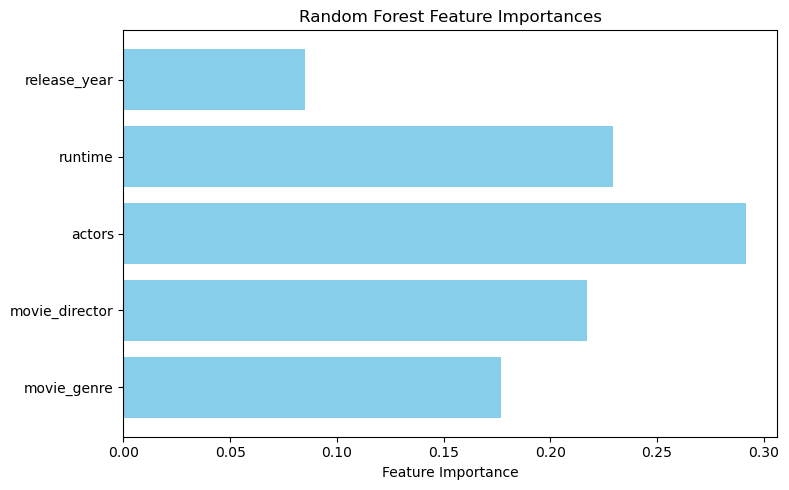

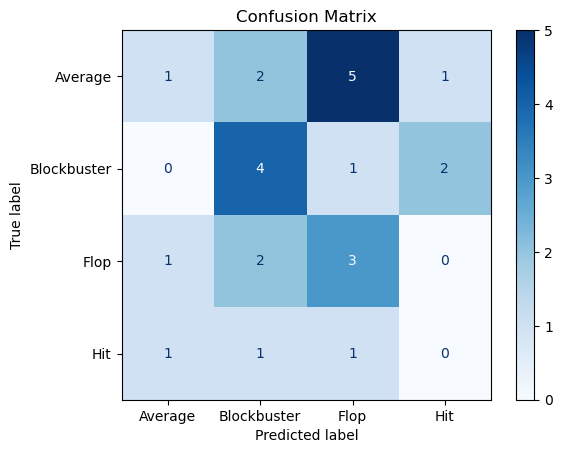

In [25]:
#Step 10: Visualize Feature Importances
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

#Step 11: Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



In [ ]:
predicted flop vs actual flop  5=5 correct true positive for flop
predicted avg vs actual flop  2=2  false positive for avg, flase negative for flop
predicted hit vs actual blockbuster 1=1 false negative for hit, false positive for blockbuster
predicted flop vs actual hit 0=0 means model does not predict not to do mistake 
predicted  avg bs acutual avg 3=3 true postive count for avg

